In [278]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path


In [279]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [280]:
NUM_CLASSES = 8

# Dataset reading

In [281]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [282]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [284]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [285]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_28 (Dropout)        (None, 42)                0         
                                                                 
 dense_42 (Dense)            (None, 20)                860       
                                                                 
 dropout_29 (Dropout)        (None, 20)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [286]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [287]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [288]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


26/31 [========================>.....] - ETA: 0s - loss: 1.9213 - accuracy: 0.2326 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 1s 10ms/step - loss: 1.8995 - accuracy: 0.2434 - val_loss: 1.7442 - val_accuracy: 0.3303
Epoch 2/1000
26/31 [========================>.....] - ETA: 0s - loss: 1.7239 - accuracy: 0.3275
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.7175 - accuracy: 0.3243 - val_loss: 1.6050 - val_accuracy: 0.3095
Epoch 3/1000
 1/31 [..............................] - ETA: 0s - loss: 1.6440 - accuracy: 0.3125

c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/31 [========================>.....] - ETA: 0s - loss: 1.6265 - accuracy: 0.3368
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 1.6170 - accuracy: 0.3420 - val_loss: 1.5054 - val_accuracy: 0.3333
Epoch 4/1000
21/31 [===================>..........] - ETA: 0s - loss: 1.5540 - accuracy: 0.3650
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 1.5283 - accuracy: 0.3787 - val_loss: 1.4232 - val_accuracy: 0.3641
Epoch 5/1000
28/31 [==========================>...] - ETA: 0s - loss: 1.4572 - accuracy: 0.3998
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.4526 - accuracy: 0.4018 - val_loss: 1.3358 - val_accuracy: 0.4634
Epoch 6/1000
27/31 [=========================>....] - ETA: 0s - loss: 1.3919 - accuracy: 0.4294
Epoch 6: savin

In [289]:
#Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9592


In [290]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [291]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[7.3261216e-02 7.9955399e-02 7.6161796e-01 4.3423190e-03 4.9023140e-02
 1.1812707e-03 3.0596117e-02 2.2506727e-05]
2


# Confusion matrix

41/41 [==============================] - 0s 2ms/step


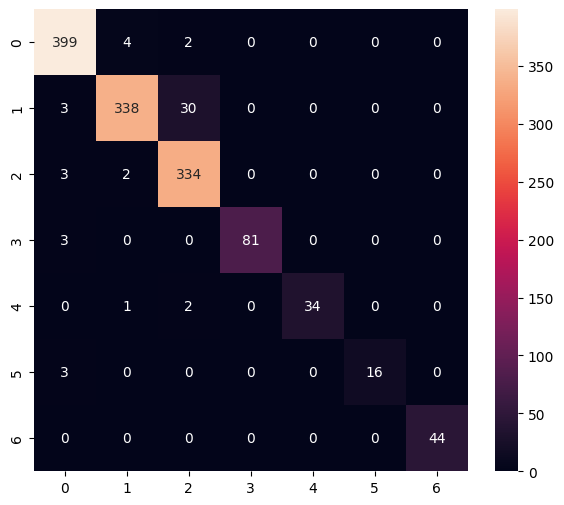

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       405
           1       0.98      0.91      0.94       371
           2       0.91      0.99      0.94       339
           3       1.00      0.96      0.98        84
           4       1.00      0.92      0.96        37
           5       1.00      0.84      0.91        19
           6       1.00      1.00      1.00        44

    accuracy                           0.96      1299
   macro avg       0.98      0.94      0.96      1299
weighted avg       0.96      0.96      0.96      1299



In [292]:

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [293]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [294]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SAJITH\AppData\Local\Temp\tmph6guwt3x\assets


INFO:tensorflow:Assets written to: C:\Users\SAJITH\AppData\Local\Temp\tmph6guwt3x\assets


6800

# Inference test

In [295]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [296]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [297]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [298]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [299]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.3261224e-02 7.9955444e-02 7.6161790e-01 4.3423213e-03 4.9023136e-02
 1.1812728e-03 3.0596117e-02 2.2506767e-05]
2
